<a href="https://colab.research.google.com/github/DanielaCentellas/Coloracion-de-videos-/blob/main/Implementacion_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from keras.utils.vis_utils import plot_model
from matplotlib import image
from matplotlib import pyplot as plt
import os
import time
import tensorflow as tf
from tensorflow import keras
tf.config.run_functions_eagerly(True)

In [ ]:
#Recuperacion de modelo entrenado
with open('model_config600.json') as json_file:
    json_config = json_file.read()
new_model1 = keras.models.model_from_json(json_config)
new_model1.load_weights('gan_weights600.h5')

In [ ]:
new_predictions = new_model1.predict(test_x1)
np.testing.assert_allclose(predictions, new_predictions, rtol=1e-6, atol=1e-6)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [ ]:
dir = '/content/drive/MyDrive/Proyecto-AI/images_video'
batch_size = 64
img_size = 120
dataset_split = 60
x1 = []
y1 = []
for image_file in os.listdir( dir )[ 0 : dataset_split ]:
    print(image_file)
    rgb_image = Image.open( os.path.join( dir , image_file )).resize( ( img_size , img_size ) )
    # Normalize the RGB image array
    rgb_img_array = (np.asarray( rgb_image ) ) / 255
    # Convert the RGB image to grayscale
    gray_image = rgb_image.convert( 'L' )
    # Normalize the grayscale image array
    gray_img_array = ( np.asarray( gray_image ).reshape( ( img_size , img_size , 1 ) ) ) / 255
    # Append both the image arrays
    x1.append( gray_img_array )
    y1.append( rgb_img_array )


# Train-test splitting 70% for training y 30% for testing
train_x1, test_x1, train_y1, test_y1 = train_test_split( np.array(x1) , np.array(y1) , test_size=0.3 )

img_vid = test_x1

images1000.png
images0.png
images2000.png
images3000.png
images5000.png
images4000.png
images500.png
images300.png
images400.png
images200.png
images100.png
images2400.png
images2300.png
images2200.png
images2100.png
images1700.png
images1900.png
images1800.png
images1600.png
images1500.png
images1300.png
images1400.png
images1200.png
images1100.png
images900.png
images800.png
images700.png
images600.png
images3800.png
images3700.png
images3600.png
images3500.png
images3400.png
images3300.png
images3200.png
images3100.png
images2900.png
images2800.png
images2700.png
images2600.png
images2500.png
images5100.png
images4900.png
images4800.png
images4700.png
images4600.png
images4500.png
images4300.png
images4200.png
images4400.png
images4100.png
images3900.png
images5400.png
images5300.png
images5200.png


In [ ]:
video = new_model1(test_x1[0 : ]).numpy()

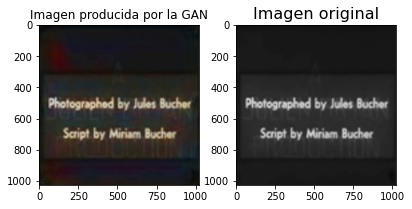

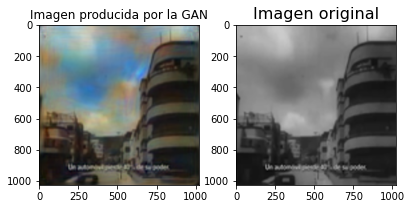

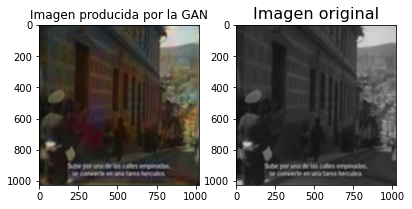

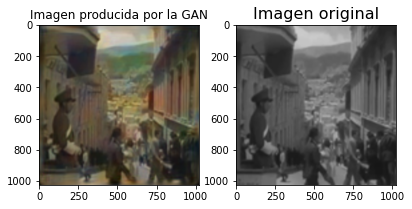

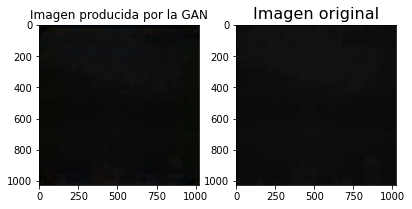

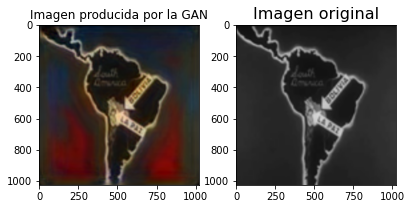

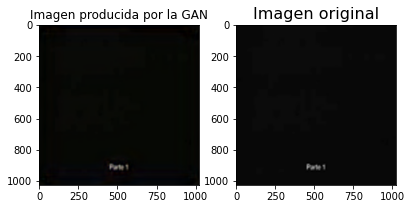

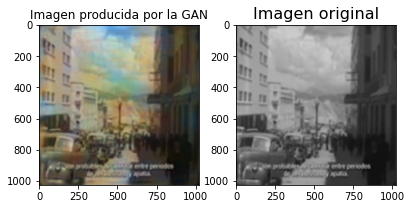

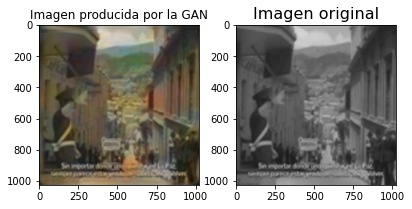

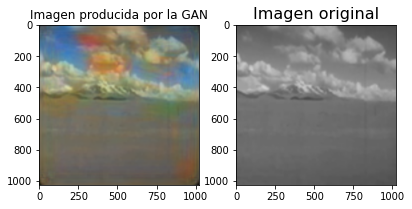

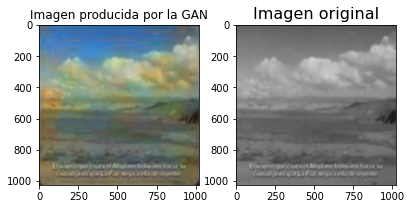

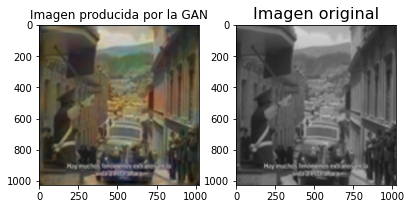

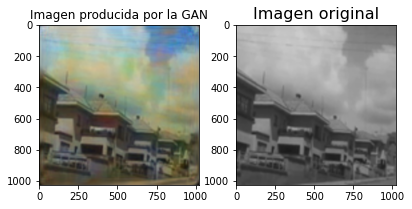

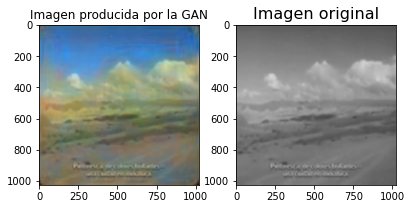

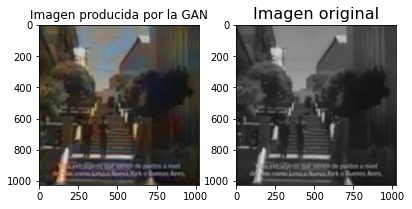

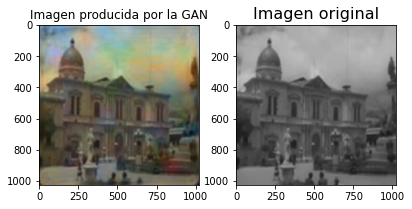

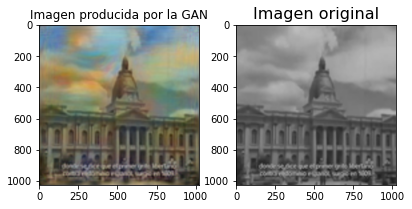

In [ ]:
for i in range (len(img_vid)):
  plt.figure(figsize=(10,10))
  or_image = plt.subplot(3,3,1)
  image = Image.fromarray(( video[i] * 255 ).astype( 'uint8' )).resize( ( 1024 , 1024 ) )
  image_vid = np.asarray( image )
  or_image.set_title('Imagen producida por la GAN', fontsize=12)
  plt.imshow( image_vid )

  in_image = plt.subplot(3,3,2)    
  image = Image.fromarray((train_y1[i] * 255 ).astype( 'uint8' )).resize( ( 1024 , 1024 ) )
  in_image.set_title('Imagen original', fontsize=16)
  plt.imshow( image )

  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True

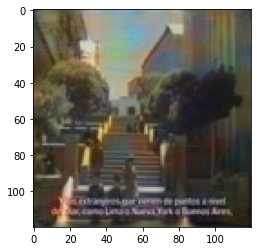

In [ ]:
ima = video[8]
plt.imshow(ima)
cv2.imwrite("/content/drive/MyDrive/Proyecto-AI/video/"+"/video_im1000.png", ima)

In [ ]:
#https://theailearner.com/2018/10/15/creating-video-from-images-using-opencv-python/comment-page-1/#comments
import numpy as np
import cv2

img_array = []
for im in range(len(video)): 
  image = Image.fromarray((video[im] * 255).astype( 'uint8' )).resize(( 1024 , 1024 ))
  im_1 = 55+im
  image_vid = np.asarray(image)
  image_vid = cv2.cvtColor(image_vid, cv2.COLOR_BGR2RGB)
  
  cv2.imwrite("/content/drive/MyDrive/Proyecto-AI/video/"+"/video_im%d.png" % im_1, image_vid)

In [ ]:
import cv2
import numpy as np
import glob

img_array_color = []

for i in range (55):
  path = "/content/drive/MyDrive/Proyecto-AI/video/"+"/video_im%d.png" % i
  img_color = cv2.imread(path)

  height, width, layers = img_color.shape
  size = (width,height)
  img_array_color.append(img_color)
 
 
out = cv2.VideoWriter('project_color1.mp4',cv2.VideoWriter_fourcc(*'mp4v'), 1, size)
 
for j in range(len(img_array_color)):
    out.write(img_array_color[j])
out.release()

In [ ]:
img_array_ant = []

for i in range (55):
  i = i*100
  path = "/content/drive/MyDrive/Proyecto-AI/images_video/"+"/images%d.png" % i
  img_ant = cv2.imread(path)

  height, width, layers = img_ant.shape
  size = (width,height)
  img_array_ant.append(img_ant)
 
 
out = cv2.VideoWriter('project_antiguo.mp4',cv2.VideoWriter_fourcc(*'mp4v'), 1, size)
 
for j in range(len(img_array_ant)):
    out.write(img_array_ant[j])
out.release()